## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [24]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#importe para modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



### Lectura del dataset generado previamente

In [25]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_credito_N,estado_civil_N,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,falta_pago,estado_cliente,genero,personas_a_cargo
0,>74,>10k,3k_to_5k,25y_to_50y,<6p,50k_to_100k,<20,5_to_10,<25,Cancelado,C,11000,3,HIPOTECA,INVERSIONES,N,ACTIVO,F,3
1,15_to_30,<1k,3k_to_5k,25y_to_50y,12p_to_18p,20k_to_50k,<20,<5,<25,Activo,S,1500,2,ALQUILER,MEJORAS_HOGAR,Y,PASIVO,M,0
2,15_to_30,1k_to_4k,5k_to_10k,25y_to_50y,12p_to_18p,20k_to_50k,20_to_40,5_to_10,<25,Cancelado,D,10000,2,OTROS,EDUCACIÓN,Y,PASIVO,M,3
3,>74,1k_to_4k,<3k,<25y,6p_to_12p,20k_to_50k,20_to_40,<5,25_to_30,Cancelado,S,6000,4,ALQUILER,INVERSIONES,N,ACTIVO,F,2
4,50_to_75,4k_to_6k,3k_to_5k,25y_to_50y,6p_to_12p,50k_to_100k,20_to_40,<5,25_to_30,Cancelado,C,10000,2,HIPOTECA,EDUCACIÓN,N,ACTIVO,F,2


### Revisión de meta-datos

In [26]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

operaciones_ult_12m
gastos_ult_12m
limite_credito_tc
antiguedad_cliente
tasa_interes
ingresos
pct_ingreso
antiguedad_empleado
edad
estado_credito_N
estado_civil_N
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
personas_a_cargo

Cantidad de filas: 10103


### Armado de los sets de entrenamiento y testeo

In [27]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'tasa_interes', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_credito_N',
       'estado_civil_N', 'estado_cliente', 'genero', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_credito_N,estado_civil_N,estado_cliente,genero,personas_a_cargo
0,>74,>10k,3k_to_5k,25y_to_50y,<6p,50k_to_100k,<20,5_to_10,<25,11000,3,HIPOTECA,INVERSIONES,Cancelado,C,ACTIVO,F,3
1,15_to_30,<1k,3k_to_5k,25y_to_50y,12p_to_18p,20k_to_50k,<20,<5,<25,1500,2,ALQUILER,MEJORAS_HOGAR,Activo,S,PASIVO,M,0
2,15_to_30,1k_to_4k,5k_to_10k,25y_to_50y,12p_to_18p,20k_to_50k,20_to_40,5_to_10,<25,10000,2,OTROS,EDUCACIÓN,Cancelado,D,PASIVO,M,3
3,>74,1k_to_4k,<3k,<25y,6p_to_12p,20k_to_50k,20_to_40,<5,25_to_30,6000,4,ALQUILER,INVERSIONES,Cancelado,S,ACTIVO,F,2
4,50_to_75,4k_to_6k,3k_to_5k,25y_to_50y,6p_to_12p,50k_to_100k,20_to_40,<5,25_to_30,10000,2,HIPOTECA,EDUCACIÓN,Cancelado,C,ACTIVO,F,2


In [28]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_to_30,operaciones_ult_12m_30_to_50,operaciones_ult_12m_50_to_75,operaciones_ult_12m_<15,operaciones_ult_12m_>74,gastos_ult_12m_1k_to_4k,gastos_ult_12m_4k_to_6k,...,estado_credito_N_Activo,estado_credito_N_Cancelado,estado_civil_N_C,estado_civil_N_D,estado_civil_N_N,estado_civil_N_S,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M
0,11000,3,3,False,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,True,False
1,1500,2,0,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
2,10000,2,3,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,True
3,6000,4,2,False,False,False,False,True,True,False,...,False,True,False,False,False,True,True,False,True,False
4,10000,2,2,False,False,True,False,False,False,True,...,False,True,True,False,False,False,True,False,True,False


In [29]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'personas_a_cargo'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [30]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                3000.0
duracion_credito                     2.0
personas_a_cargo                     3.0
operaciones_ult_12m_15_to_30       False
operaciones_ult_12m_30_to_50        True
operaciones_ult_12m_50_to_75       False
operaciones_ult_12m_<15            False
operaciones_ult_12m_>74            False
gastos_ult_12m_1k_to_4k             True
gastos_ult_12m_4k_to_6k            False
gastos_ult_12m_6k_to_8k            False
gastos_ult_12m_8k_to_10k           False
gastos_ult_12m_<1k                 False
gastos_ult_12m_>10k                False
limite_credito_tc_3k_to_5k         False
limite_credito_tc_5k_to_10k        False
limite_credito_tc_<3k              False
limite_credito_tc_>10k              True
antiguedad_cliente_25y_to_50y       True
antiguedad_cliente_<25y            False
antiguedad_cliente_>50y            False
tasa_interes_12p_to_18p            False
tasa_interes_6p_to_12p              True
tasa_interes_<6p          

In [31]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [32]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

##### ZeroR

In [33]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

2023/12/03 17:47:55 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during sklearn autologging: Could not create run under non-active experiment with ID 589148203853435412.


DummyClassifier(constant=None, random_state=None, strategy='prior')

In [34]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.8186856690419636
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'Y' 'N']


----
#### Prueba 1

Se pasa a configurar la serie de experimentos en **mlflow**

In [35]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

2023/12/03 17:47:55 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #1' does not exist. Creating a new experiment.
2023/12/03 17:47:56 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2023/12/03 17:47:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


##### Regresión Logística

In [36]:
with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear')

    lreg.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #1
Rendimiento obtenido: 0.897070467141726
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.98      0.94      2068
           Y       0.85      0.52      0.65       458

    accuracy                           0.90      2526
   macro avg       0.88      0.75      0.79      2526
weighted avg       0.89      0.90      0.89      2526

Matriz de confusión:


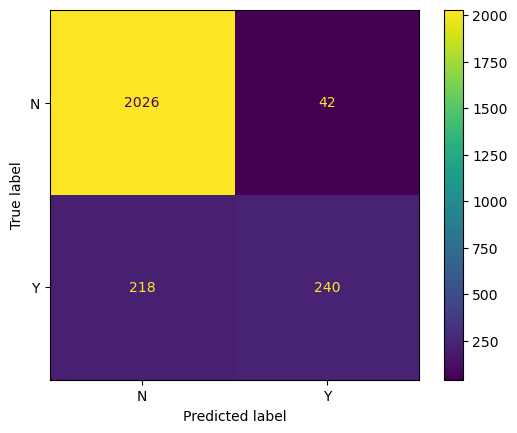

In [37]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #1")
evaluar_modelo(lreg, test_data, test_labels)

##### KNN

In [38]:
with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #1
Rendimiento obtenido: 0.8273950910530483
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.90      2068
           Y       0.96      0.05      0.10       458

    accuracy                           0.83      2526
   macro avg       0.89      0.52      0.50      2526
weighted avg       0.85      0.83      0.76      2526

Matriz de confusión:


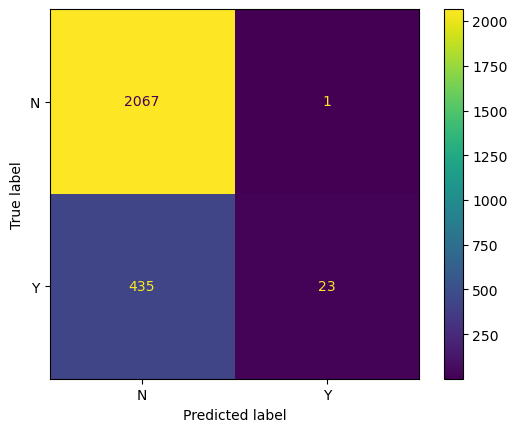

In [39]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #1")
evaluar_modelo(knn, test_data, test_labels)

##### Árboles de Decisión (TDIDT)

In [40]:
with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #1
Rendimiento obtenido: 0.8962787015043547
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.98      0.94      2068
           Y       0.86      0.52      0.64       458

    accuracy                           0.90      2526
   macro avg       0.88      0.75      0.79      2526
weighted avg       0.89      0.90      0.89      2526

Matriz de confusión:


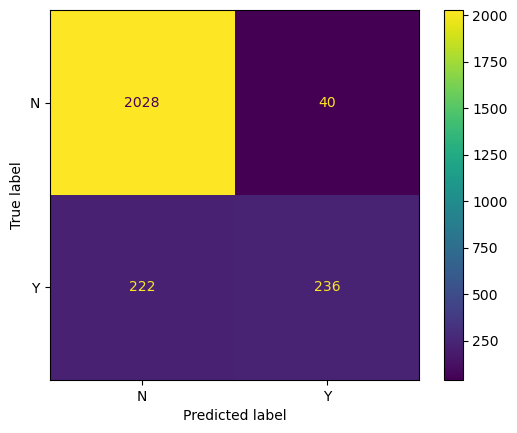

In [41]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #1")
evaluar_modelo(dtc, test_data, test_labels)

##### Métodos de ensamblado de modelos: RandomForest

In [42]:
with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10)
    rndf.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #1
Rendimiento obtenido: 0.8966745843230404
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.97      0.94      2068
           Y       0.82      0.55      0.66       458

    accuracy                           0.90      2526
   macro avg       0.86      0.76      0.80      2526
weighted avg       0.89      0.90      0.89      2526

Matriz de confusión:


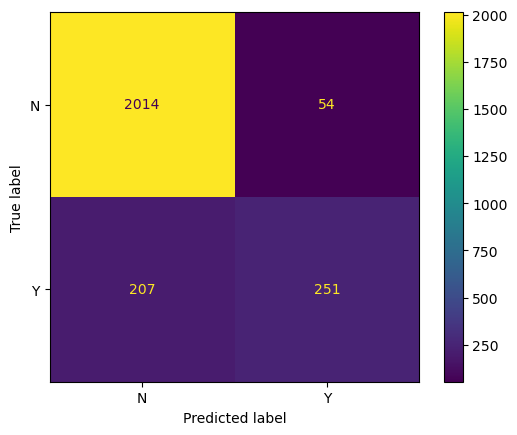

In [43]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #1")
evaluar_modelo(rndf, test_data, test_labels)

----
#### Prueba #2

In [44]:
mlflow.set_experiment(experiment_name="Prueba #2")

2023/12/03 17:48:31 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #2' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///g:/Other%20computers/Mi%20Port%C3%A1til%20%281%29/IQ/UNIVERSIDAD%20INTERNACIONAL%20DE%20VALENCIA/13MBID%20-%20GESTION%20DE%20PROYECTOS/13MBID-Abr23/notebooks/03-Modelado%2BEvaluacion/mlruns/237315884583183836', creation_time=1701643711576, experiment_id='237315884583183836', last_update_time=1701643711576, lifecycle_stage='active', name='Prueba #2', tags={}>

##### Regresión Logística

In [45]:
with mlflow.start_run(run_name='Logistic Regression (#2)'):
    lreg = LogisticRegression(solver = 'newton-cg')

    lreg.fit(train_data, train_labels)

c:\Users\Asus_i5\miniconda3\envs\viu\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Asus_i5\miniconda3\envs\viu\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\Asus_i5\miniconda3\envs\viu\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\Asus_i5\miniconda3\envs\viu\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8990498812351544
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.98      0.94      2068
           Y       0.85      0.53      0.66       458

    accuracy                           0.90      2526
   macro avg       0.88      0.76      0.80      2526
weighted avg       0.90      0.90      0.89      2526

Matriz de confusión:


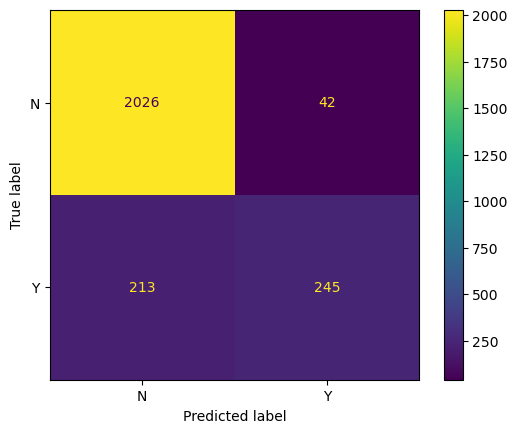

In [46]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(lreg, test_data, test_labels)

##### KNN

In [47]:
with mlflow.start_run(run_name='KNN (#2)'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'kd_tree', 
                               leaf_size = 20)

    knn.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8254156769596199
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.82      1.00      0.90      2068
           Y       0.95      0.04      0.08       458

    accuracy                           0.83      2526
   macro avg       0.89      0.52      0.49      2526
weighted avg       0.85      0.83      0.75      2526

Matriz de confusión:


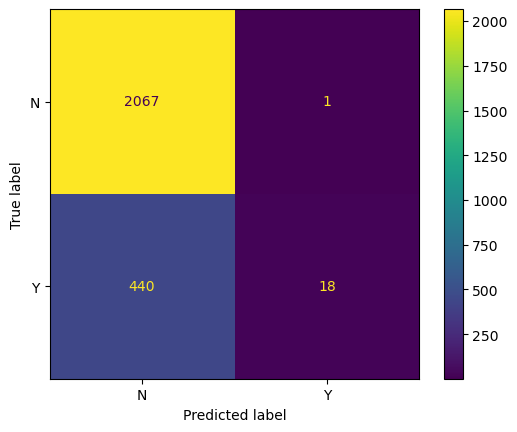

In [48]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(knn, test_data, test_labels)

##### Árboles de Decisión (TDIDT)

In [49]:
with mlflow.start_run(run_name='Decision Tree (#2)'):
    dtc = DecisionTreeClassifier(max_depth=4, 
                                 criterion='entropy',
                                 splitter='best',  
                                 min_samples_split=50)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8962787015043547
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.98      0.94      2068
           Y       0.85      0.52      0.64       458

    accuracy                           0.90      2526
   macro avg       0.88      0.75      0.79      2526
weighted avg       0.89      0.90      0.89      2526

Matriz de confusión:


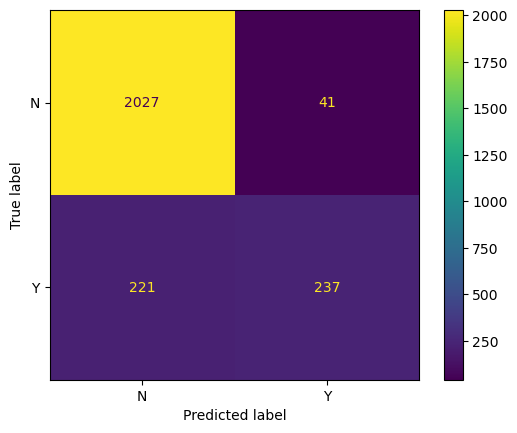

In [50]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(dtc, test_data, test_labels)

##### Métodos de ensamblado de modelos: RandomForest

In [51]:
with mlflow.start_run(run_name='Random Forest (#2)'):
    rndf = RandomForestClassifier(n_estimators=20)
    rndf.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.89944576405384
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.98      0.94      2068
           Y       0.84      0.55      0.66       458

    accuracy                           0.90      2526
   macro avg       0.87      0.76      0.80      2526
weighted avg       0.90      0.90      0.89      2526

Matriz de confusión:


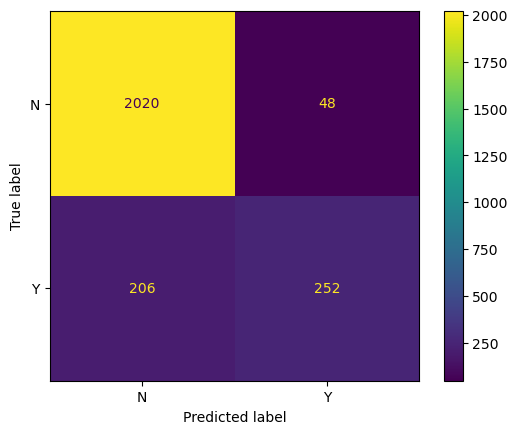

In [52]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(rndf, test_data, test_labels)

----
#### Prueba #3

In [53]:
mlflow.set_experiment(experiment_name="Prueba #3")

2023/12/03 17:48:59 INFO mlflow.tracking.fluent: Experiment with name 'Prueba #3' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///g:/Other%20computers/Mi%20Port%C3%A1til%20%281%29/IQ/UNIVERSIDAD%20INTERNACIONAL%20DE%20VALENCIA/13MBID%20-%20GESTION%20DE%20PROYECTOS/13MBID-Abr23/notebooks/03-Modelado%2BEvaluacion/mlruns/919372128244735107', creation_time=1701643739042, experiment_id='919372128244735107', last_update_time=1701643739042, lifecycle_stage='active', name='Prueba #3', tags={}>

##### Regresión Logística

In [54]:
with mlflow.start_run(run_name='Logistic Regression (#3)'):
    lreg = LogisticRegression(solver = 'newton-cholesky')

    lreg.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8990498812351544
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.98      0.94      2068
           Y       0.85      0.53      0.66       458

    accuracy                           0.90      2526
   macro avg       0.88      0.76      0.80      2526
weighted avg       0.90      0.90      0.89      2526

Matriz de confusión:


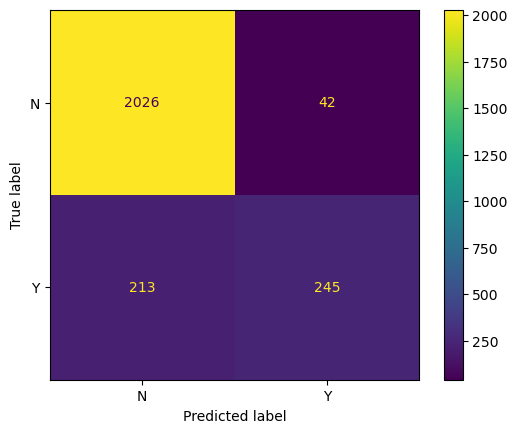

In [55]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(lreg, test_data, test_labels)

##### KNN

In [56]:
with mlflow.start_run(run_name='KNN (#3)'):
    knn = KNeighborsClassifier(n_neighbors=40, 
                               algorithm = 'auto', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Exception in thread Thread-50 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\Asus_i5\miniconda3\envs\viu\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\Users\Asus_i5\miniconda3\envs\viu\Lib\threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Asus_i5\miniconda3\envs\viu\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 16: invalid start byte
c:\Users\Asus_i5\miniconda3\envs\viu\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\As

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.828978622327791
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.83      1.00      0.91      2068
           Y       0.93      0.06      0.11       458

    accuracy                           0.83      2526
   macro avg       0.88      0.53      0.51      2526
weighted avg       0.85      0.83      0.76      2526

Matriz de confusión:


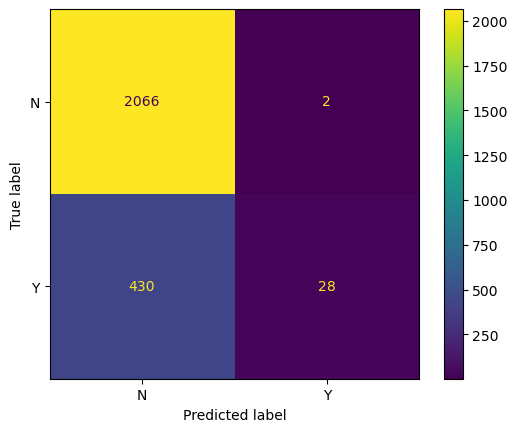

In [57]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(knn, test_data, test_labels)

##### Árboles de Decisión (TDIDT)

In [58]:
with mlflow.start_run(run_name='Decision Tree (#3)'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='gini',
                                 splitter='random', 
                                 min_samples_split=50)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.8978622327790974
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.97      0.94      2068
           Y       0.82      0.56      0.67       458

    accuracy                           0.90      2526
   macro avg       0.86      0.77      0.80      2526
weighted avg       0.89      0.90      0.89      2526

Matriz de confusión:


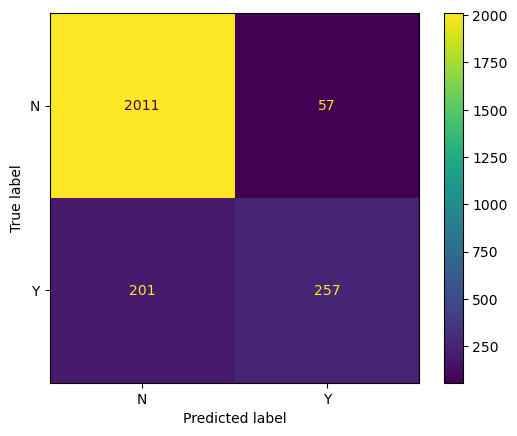

In [59]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(dtc, test_data, test_labels)

##### Métodos de ensamblado de modelos: RandomForest

In [60]:
with mlflow.start_run(run_name='Random Forest (#3)'):
    rndf = RandomForestClassifier(n_estimators=15)
    rndf.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #3
Rendimiento obtenido: 0.900633412509897
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.92      0.97      0.94      2068
           Y       0.80      0.60      0.69       458

    accuracy                           0.90      2526
   macro avg       0.86      0.78      0.81      2526
weighted avg       0.90      0.90      0.89      2526

Matriz de confusión:


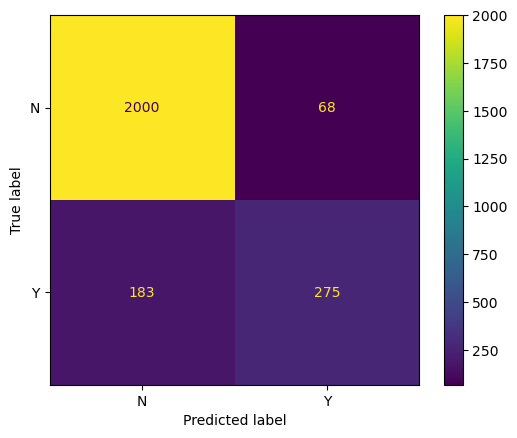

In [61]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #3")
evaluar_modelo(rndf, test_data, test_labels)

#### TODO: posibilidades de mejora de la libreta

* Evaluación del clasificador a través de validación cruzada
* Ejecutar pruebas que contemplen datos con mayor o menor grado de transformaciones aplicadas 
* Implementar clasificación con otras técnicas (por ejemplo: redes neuronales, SVM, entre otras)
* Evaluar la combinación de técnicas, por ejemplo: clustering y sobre esos resultados aplicación de árboles de decisión para detectar patrones de agrupamiento y ahí relacionarlo con la situación de los clientes.
* Integrar técnicas de extracción de reglas de asociación (con mayor "legibilidad" para usuarios no-técnicos)
* Entre otras opciones

# REVISADO DE AQUÍ HACIA ARRIBA

----

### Prueba de despliegue (utilzando datos nuevos)

In [65]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


**Importante**: recordar que si se implementan operaciones de transformación sobre los datos será necesario (posiblemente) replicarlas sobre los datos nuevos para que ambos datasets sean compatibles.

#### Se tienen que aplicar las adaptaciones realizadas sobre los datos de entrenamiento

In [66]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}

estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0 : 'Cancelado',
    1 : 'Activo',
}

estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# Antiguedad del empleado
etiquetas_a_e = ['<5', '5_to_10', '>10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleados_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

# edad
etiquetas_e = ['<25', '25_to_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# pct_ingreso
etiquetas_p_i = ['<20', '20_to_40', '40_to_60', '>60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# ingresos
etiquetas_i = ['<20k', '20k_to_50k', '50k_to_100k', '>100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# tasa_interes
etiquetas_t_i = ['<6p', '6p_to_12p', '12p_to_18p', '>18p']
rangos_t_i = [0, 5.99, 11.99, 17.99, 100]
tasa_interes_N = pd.cut(datos_nuevos['tasa_interes'], 
                                bins=rangos_t_i, 
                                labels=etiquetas_t_i)

# antiguedad_cliente
etiquetas_a_c = ['<25y', '25y_to_50y', '>50y']
rangos_a_c = [0, 24, 49, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# limite_credito_tc
etiquetas_l_tc = ['<3k', '3k_to_5k', '5k_to_10k', '>10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# gastos_ult_12m
etiquetas_g_u12 = ['<1k', '1k_to_4k', '4k_to_6k', '6k_to_8k', '8k_to_10k', '>10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# operaciones_ult_12m
etiquetas_o_u12 = ['<15', '15_to_30', '30_to_50', '50_to_75', '>74']
rangos_o_u12 = [0, 14, 29, 49, 74, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)

col_eliminar_final = [
              'edad',
              'estado_civil', 
              'estado_credito',
              'antiguedad_empleado',
              'antiguedad_cliente', 
              'ingresos',
              'pct_ingreso',
              'tasa_interes',
              'gastos_ult_12m', 
              'limite_credito_tc', 
              'operaciones_ult_12m',
              'id_cliente',
              'nivel_tarjeta',
              'nivel_educativo']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)


df_nuevo = pd.concat([operaciones_ult_12m_N, gastos_ult_12m_N, limite_credito_tc_N, antiguedad_cliente_N, tasa_interes_N, ingresos_N, pct_ingreso_N, antiguedad_empleados_N, edad_N, estado_civil_N, estado_credito_N, datos_nuevos], axis=1)
df_nuevo.head(5)

,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,tasa_interes,ingresos,pct_ingreso,antiguedad_empleado,edad,estado_civil,estado_credito,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,personas_a_cargo
0,>74,>10k,3k_to_5k,25y_to_50y,6p_to_12p,50k_to_100k,<20,<5,<25,S,Cancelado,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,1.0
1,>74,1k_to_4k,<3k,<25y,6p_to_12p,>100k,<20,<5,25_to_30,C,Cancelado,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,3.0
2,50_to_75,1k_to_4k,3k_to_5k,25y_to_50y,12p_to_18p,20k_to_50k,<20,<5,<25,C,Cancelado,1700,2,HIPOTECA,SALUD,ACTIVO,M,1.0
3,>74,4k_to_6k,3k_to_5k,25y_to_50y,6p_to_12p,50k_to_100k,<20,<5,25_to_30,C,Cancelado,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,2.0
4,>74,4k_to_6k,3k_to_5k,25y_to_50y,6p_to_12p,50k_to_100k,<20,5_to_10,25_to_30,C,Cancelado,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,1.0


In [67]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   importe_solicitado              112 non-null    int64  
 1   duracion_credito                112 non-null    int64  
 2   personas_a_cargo                112 non-null    float64
 3   operaciones_ult_12m_<15         112 non-null    bool   
 4   operaciones_ult_12m_15_to_30    112 non-null    bool   
 5   operaciones_ult_12m_30_to_50    112 non-null    bool   
 6   operaciones_ult_12m_50_to_75    112 non-null    bool   
 7   operaciones_ult_12m_>74         112 non-null    bool   
 8   gastos_ult_12m_<1k              112 non-null    bool   
 9   gastos_ult_12m_1k_to_4k         112 non-null    bool   
 10  gastos_ult_12m_4k_to_6k         112 non-null    bool   
 11  gastos_ult_12m_6k_to_8k         112 non-null    bool   
 12  gastos_ult_12m_8k_to_10k        112 

In [68]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
display(columnas_faltantes)
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0 # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

{'estado_civil_N_C',
 'estado_civil_N_D',
 'estado_civil_N_N',
 'estado_civil_N_S',
 'estado_credito_N_Activo',
 'estado_credito_N_Cancelado',
 'situacion_vivienda_OTROS'}

Datos nuevos: 65
Datos entrenamiento: 58
set()


In [69]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'personas_a_cargo',
       'operaciones_ult_12m_15_to_30', 'operaciones_ult_12m_30_to_50',
       'operaciones_ult_12m_50_to_75', 'operaciones_ult_12m_<15',
       'operaciones_ult_12m_>74', 'gastos_ult_12m_1k_to_4k',
       'gastos_ult_12m_4k_to_6k', 'gastos_ult_12m_6k_to_8k',
       'gastos_ult_12m_8k_to_10k', 'gastos_ult_12m_<1k', 'gastos_ult_12m_>10k',
       'limite_credito_tc_3k_to_5k', 'limite_credito_tc_5k_to_10k',
       'limite_credito_tc_<3k', 'limite_credito_tc_>10k',
       'antiguedad_cliente_25y_to_50y', 'antiguedad_cliente_<25y',
       'antiguedad_cliente_>50y', 'tasa_interes_12p_to_18p',
       'tasa_interes_6p_to_12p', 'tasa_interes_<6p', 'tasa_interes_>18p',
       'ingresos_20k_to_50k', 'ingresos_50k_to_100k', 'ingresos_<20k',
       'ingresos_>100k', 'pct_ingreso_20_to_40', 'pct_ingreso_40_to_60',
       'pct_ingreso_<20', 'pct_ingreso_>60', 'antiguedad_empleado_5_to_10',
       'antiguedad_empleado_<5', 'antiguedad

In [70]:
# Se hace la predicción con los nuevos datos

prediccion_nuevos = rndf.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

2023/12/03 19:22:43 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Asus_i5\miniconda3\envs\viu\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [71]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

prediccion_mora
N    90
Y    22
Name: count, dtype: int64